In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import country_converter as coco

import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
year='2015'

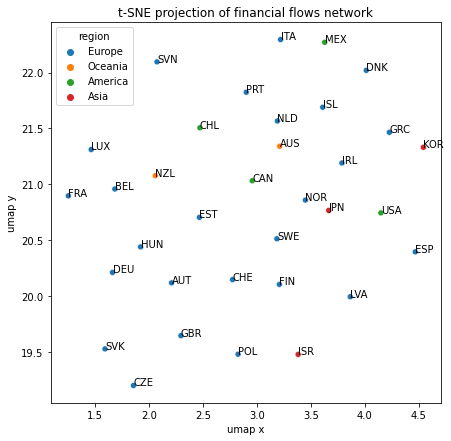

In [4]:
def plot_umap(graph):

    g = nx.linalg.graphmatrix.adjacency_matrix(graph).toarray()

    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(g)

    names = list(G.nodes)
    regions = {c:coco.convert(c, to='Continent') for c in names}
    regions['ROW'] = 'Rest of the world'
    
    df_plot = pd.DataFrame({'umap x':embedding[:, 0], 'umap y':embedding[:, 1], 'country':names, })
    df_plot['region'] = df_plot.country.map(regions)
    
    fig, ax = plt.subplots(figsize=(7,7))

    sns.scatterplot(data=df_plot, x='umap x', y='umap y', hue = 'region', ax=ax)
    
    for i, txt in enumerate(names):
        ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]))

    
    
network_path = os.path.join(output_filepath, year, 'A_country.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)

plot_umap(G)
plt.title('t-SNE projection of financial flows network')
plt.show()

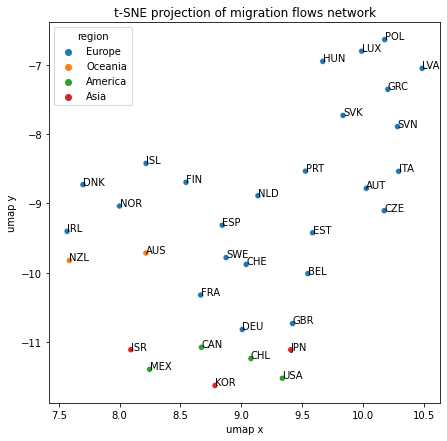

In [5]:
network_path = os.path.join(output_filepath, year, 'migration_network.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)
plot_umap(G)
plt.title('t-SNE projection of migration flows network')

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'tsne_migration_network.png')
plt.savefig(save_to)    
plt.show()

In [6]:
network_path = os.path.join(output_filepath, '2010', 'migration_network.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)
{k:v for k,v in G['GBR'].items() if v['weight']>0}

{'AUS': {'weight': 0.0008333793183349817},
 'AUT': {'weight': 3.829655906509204e-05},
 'BEL': {'weight': 6.882144477467641e-05},
 'CAN': {'weight': 0.0002720085674427686},
 'CHE': {'weight': 0.0001705710638066243},
 'CZE': {'weight': 9.862846507391267e-06},
 'DEU': {'weight': 0.0002863034525705699},
 'DNK': {'weight': 3.0431251090843308e-05},
 'ESP': {'weight': 0.0005047842296330347},
 'EST': {'weight': 5.305961728659859e-07},
 'FIN': {'weight': 8.115000290891549e-06},
 'HUN': {'weight': 1.03622311406769e-05},
 'IRL': {'weight': 7.802884895088028e-05},
 'ISL': {'weight': 3.3396347350976757e-06},
 'ISR': {'weight': 1.9725693014782535e-05},
 'ITA': {'weight': 4.893969406199211e-05},
 'JPN': {'weight': 0.00018102692956604223},
 'KOR': {'weight': 5.39023288552681e-05},
 'LUX': {'weight': 1.2952788925846127e-05},
 'LVA': {'weight': 1.8726923748211266e-06},
 'MEX': {'weight': 7.740461815927324e-06},
 'NLD': {'weight': 0.00013626958180781732},
 'NOR': {'weight': 4.563127086647479e-05},
 'NZL'

In [7]:
len(list(nx.strongly_connected_components(G)))

2

In [8]:
list(nx.strongly_connected_components(G))

[{'AUS',
  'AUT',
  'BEL',
  'CAN',
  'CHE',
  'CHL',
  'CZE',
  'DEU',
  'DNK',
  'ESP',
  'EST',
  'FIN',
  'FRA',
  'GBR',
  'HUN',
  'IRL',
  'ISL',
  'ISR',
  'ITA',
  'JPN',
  'KOR',
  'LUX',
  'LVA',
  'MEX',
  'NLD',
  'NOR',
  'NZL',
  'POL',
  'PRT',
  'SVK',
  'SVN',
  'SWE',
  'USA'},
 {'GRC'}]